In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [7]:
df.shape

(244, 7)

In [8]:
#sütun isimleri
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [9]:
#kategorik değişkenler dahil değil
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [11]:
#kategorik değerleride dahil etmek için kullanılır ancak anlamlı olmaz
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_bill,244.0,NaN,NaN,NaN,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,NaN,NaN,NaN,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244.0,NaN,NaN,NaN,2.569672,0.9511,1.0,2.0,2.0,3.0,6.0


In [12]:
#eksik değerleri inceleyelim
df.isnull().any()

total_bill    False
tip           False
sex           False
smoker        False
day           False
time          False
size          False
dtype: bool

In [13]:
df.isnull().values.any()

False

In [14]:
#hangi değişkende kaç tane eksik var
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [15]:
#kategorik değerleri inceleyelim
df["sex"].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [16]:
df.smoker.unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [17]:
df["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [18]:
df["time"].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [19]:
#kategorik değişkenlerin frekanslarına erişelim
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [20]:
df["smoker"].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [21]:
df["day"].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [22]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [23]:
df["sex"].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

<AxesSubplot:>

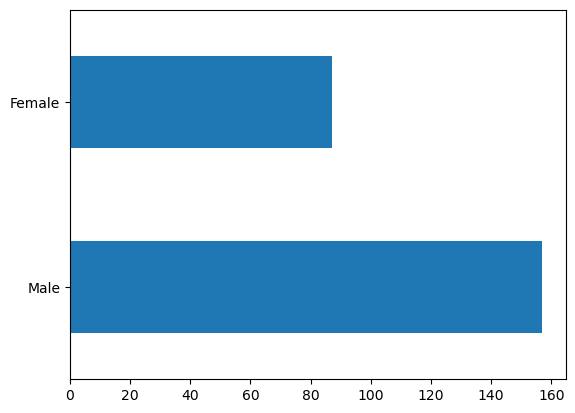

In [24]:
df["sex"].value_counts().plot.barh()

<AxesSubplot:>

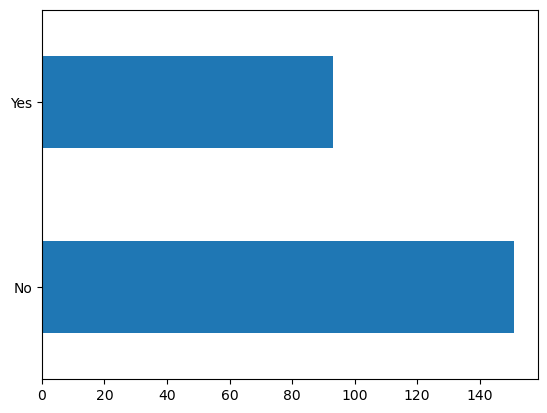

In [25]:
df_smoker = df["smoker"].value_counts()
df_smoker.plot.barh()

In [26]:
df["day"].value_counts().values

array([87, 76, 62, 19], dtype=int64)

<BarContainer object of 4 artists>

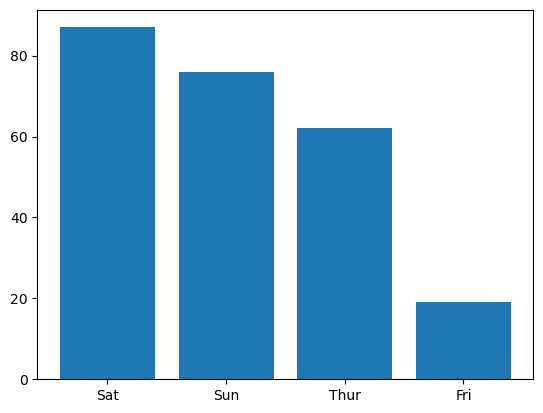

In [27]:
plt.bar(x = df["day"].value_counts().index, height = df["day"].value_counts().values)

In [28]:
df["time"].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

<BarContainer object of 2 artists>

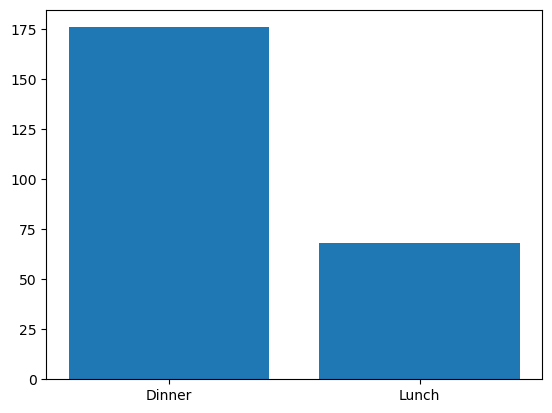

In [29]:
plt.bar(df["time"].value_counts().index,df["time"].value_counts().values)

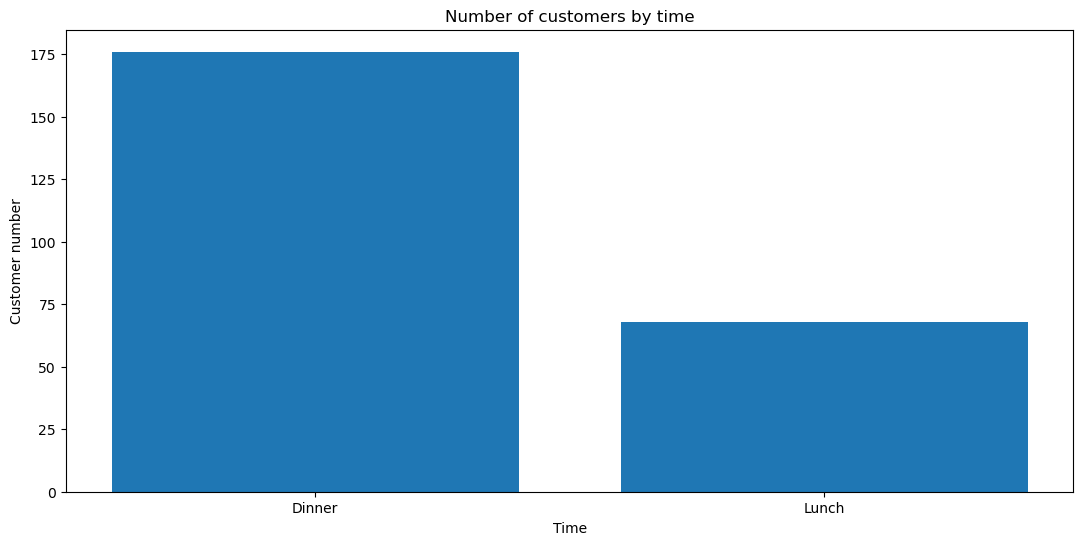

In [30]:
plt.figure(figsize=(13,6))

plt.bar(df["time"].value_counts().index,df["time"].value_counts().values)

plt.xlabel("Time")
plt.ylabel("Customer number")
plt.title("Number of customers by time")
plt.show()

In [31]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
#Cinsiyer üzerinden analizler yapalım

In [33]:
#Cinsiyete göre ortalama hesap tutarına bakalım
df.groupby("sex")[["total_bill"]].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [34]:
df.groupby("sex")[["total_bill"]].mean().reset_index()

,sex,total_bill
0,Male,20.744076
1,Female,18.056897


In [35]:
#Cinsiyete göre sigara içen/içmeyen sayısı
df.groupby("sex")[["smoker"]].count().reset_index()

,sex,smoker
0,Male,157
1,Female,87


In [36]:
#cinsiyete göre bahşiş bırakma ortalaması
df.groupby("sex")[["tip"]].mean().reset_index()

,sex,tip
0,Male,3.089618
1,Female,2.833448


In [37]:
#Günlere göre ortalama hesap
df.groupby("day")[["total_bill"]].mean().reset_index()

,day,total_bill
0,Thur,17.682742
1,Fri,17.151579
2,Sat,20.441379
3,Sun,21.410000


In [38]:
df.groupby("day")[["total_bill"]].mean().reset_index().sort_values(by="total_bill",ascending=False)

,day,total_bill
3,Sun,21.410000
2,Sat,20.441379
0,Thur,17.682742
1,Fri,17.151579


In [39]:
day_total_bill= df.groupby("day")[["total_bill"]].mean().reset_index()
day_total_bill.sort_values(by="total_bill",ascending=True)

,day,total_bill
1,Fri,17.151579
0,Thur,17.682742
2,Sat,20.441379
3,Sun,21.410000


In [40]:
df.groupby("day")[["total_bill","tip"]].mean().reset_index()

,day,total_bill,tip
0,Thur,17.682742,2.771452
1,Fri,17.151579,2.734737
2,Sat,20.441379,2.993103
3,Sun,21.410000,3.255132


In [41]:
df.groupby(["day","time"])[["total_bill","tip"]].mean().reset_index()

,day,time,total_bill,tip
0,Thur,Lunch,17.664754,2.767705
1,Thur,Dinner,18.780000,3.000000
2,Fri,Lunch,12.845714,2.382857
3,Fri,Dinner,19.663333,2.940000
4,Sat,Lunch,NaN,NaN
5,Sat,Dinner,20.441379,2.993103
6,Sun,Lunch,NaN,NaN
7,Sun,Dinner,21.410000,3.255132


In [42]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [43]:
#Günlere ve cinsiyete göre müşteri sayısı
df.groupby(["day","sex"])["time"].count().reset_index()

,day,sex,time
0,Thur,Male,30
1,Thur,Female,32
2,Fri,Male,10
3,Fri,Female,9
4,Sat,Male,59
5,Sat,Female,28
6,Sun,Male,58
7,Sun,Female,18


<AxesSubplot:xlabel='day', ylabel='time'>

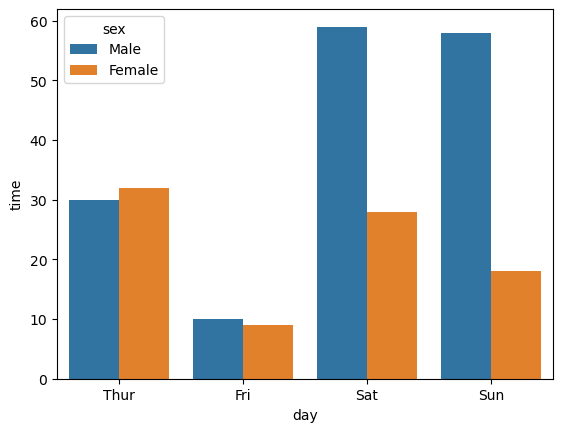

In [44]:
day_sex = df.groupby(["day","sex"])["time"].count().reset_index()
sns.barplot(x=day_sex["day"],y=day_sex["time"],hue=day_sex["sex"])

In [45]:
time_sex = df.groupby(["time","sex"])["day"].count().reset_index()
time_sex

,time,sex,day
0,Lunch,Male,33
1,Lunch,Female,35
2,Dinner,Male,124
3,Dinner,Female,52


<AxesSubplot:xlabel='time', ylabel='day'>

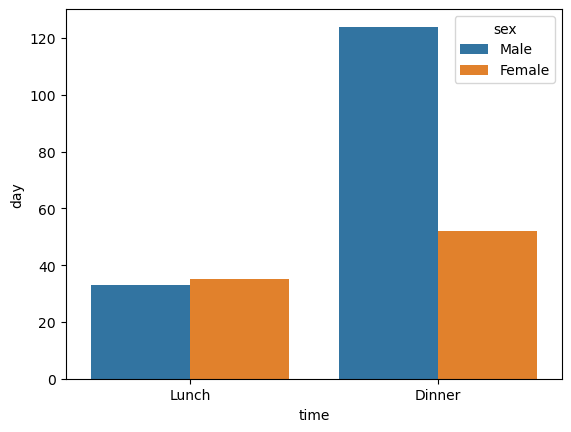

In [46]:
sns.barplot(x="time",y="day",hue="sex",data=time_sex)

In [47]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


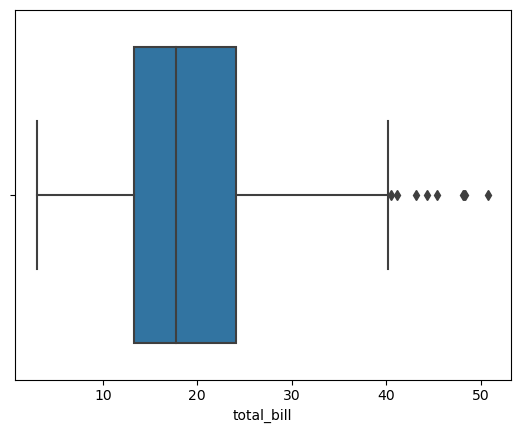

In [48]:
#boxplot, sayısal,sürekli verileri görselleştirmek için kullanılır.
sns.boxplot(x=df["total_bill"]);

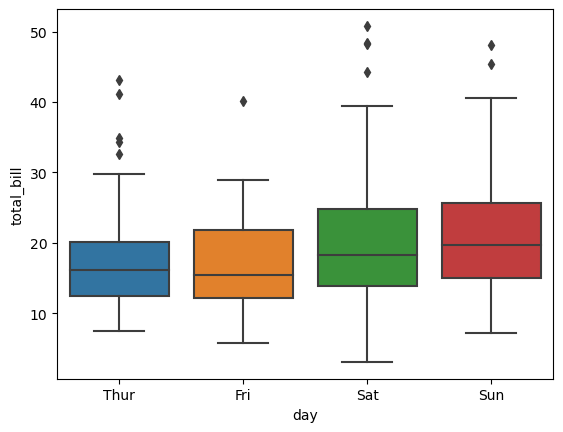

In [49]:
sns.boxplot(x="day",y="total_bill",data=df);

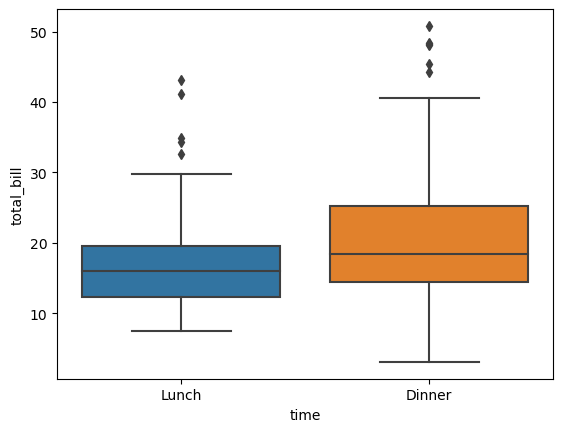

In [50]:
sns.boxplot(x="time",y="total_bill",data=df);

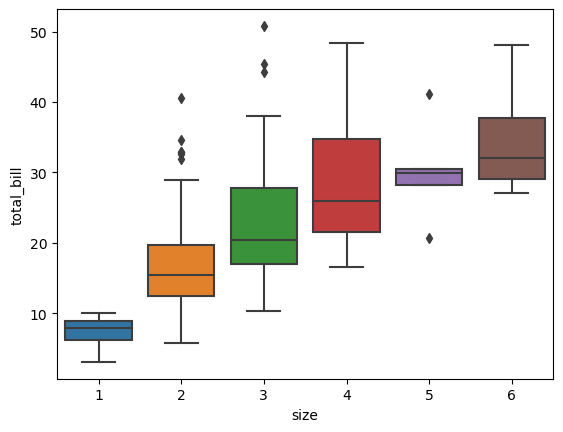

In [51]:
#kişi sayısı arttıkça kazanç
sns.boxplot(x="size",y="total_bill",data=df);

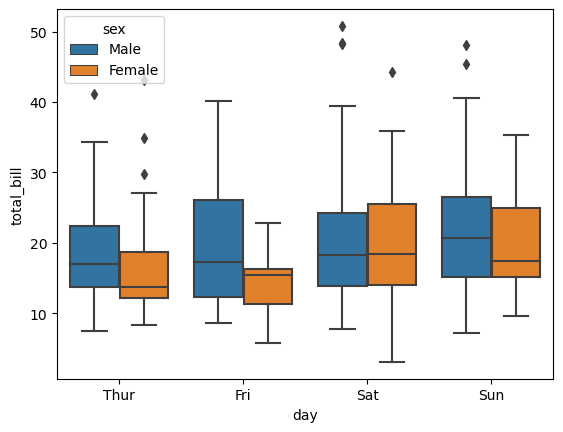

In [52]:
sns.boxplot(x="day",y="total_bill",hue="sex",data=df);

In [53]:
#scatterplot, iki değişken arasındaki ilişkiyi gösterir

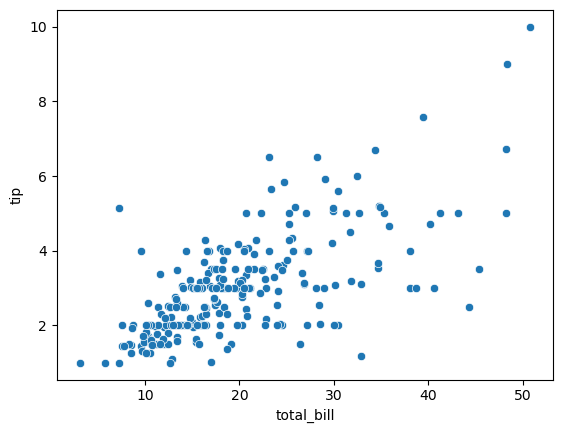

In [54]:
sns.scatterplot(x="total_bill",y="tip",data=df);

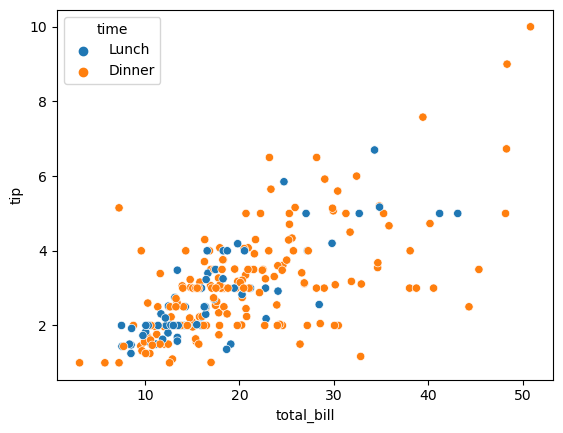

In [55]:
sns.scatterplot(x="total_bill",y="tip",hue="time",data=df);

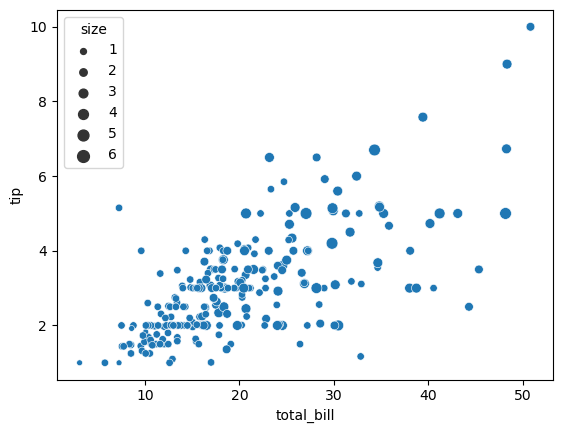

In [56]:
sns.scatterplot(x="total_bill",y="tip",size="size",data=df);

In [57]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


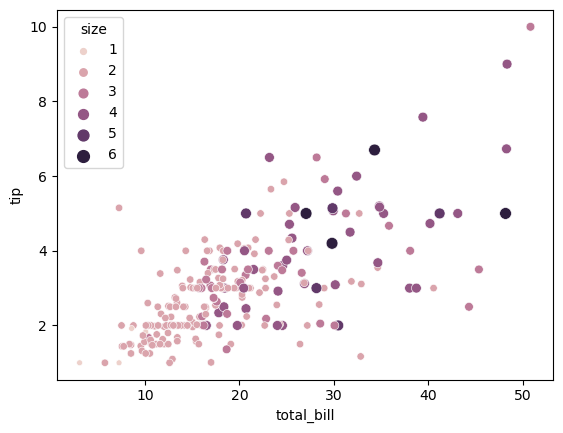

In [58]:
sns.scatterplot(x="total_bill",y="tip",hue="size",size="size",data=df);

In [62]:
import seaborn as sns
Titanic=sns.load_dataset("titanic")
Titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [77]:
Titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [66]:
Titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [67]:
Titanic.info

<bound method DataFrame.info of      survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_m

In [68]:
Titanic.shape

(891, 15)

In [69]:
Titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [70]:
Titanic.describe().T

,count,mean,std,min,25%,50%,75%,max
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [71]:
Titanic.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [72]:
Titanic.isnull().values.any()

True

In [73]:
Titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [81]:
Titanic["survived"].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:>

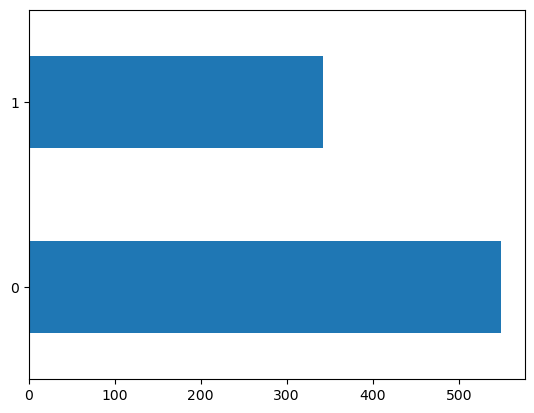

In [82]:
Titanic["survived"].value_counts().plot.barh()

In [78]:
Titanic["sex"].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [80]:
Titanic["class"].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [79]:
Titanic["class"].value_counts().values

array([491, 216, 184], dtype=int64)

<AxesSubplot:>

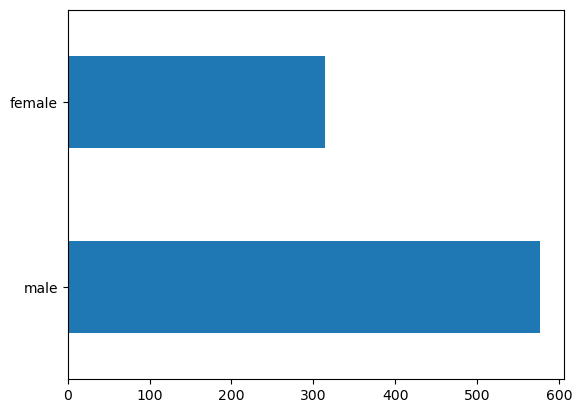

In [76]:
Titanic["sex"].value_counts().plot.barh()

In [83]:
#cinsiyete göre hayatta kalma
Titanic.groupby("sex")[["survived"]].count().reset_index()

,sex,survived
0,female,314
1,male,577
